# 03 draft value Notebook

This notebook implements the analysis for the 03 draft value stage of the Fantasy Football Analysis project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to path
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
# TODO: Implement 03 draft value analysis

In [3]:
# Import project modules
from src.data.data_loader import load_config, load_all_data
from src.data.data_loader import load_csv_data
from src.analysis.draft_value import (
    analyze_adp_vs_performance,
    calculate_vbd_rankings
)
from src.visualization.draft_vis import (
    plot_round_performance,
    plot_position_value_by_round,
    plot_vbd_rankings
)
from src.utils.validation import validate_analysis_output

# Set pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [4]:
# 1. Load configuration and processed data
config = load_config()
performance_df = load_csv_data(os.path.join(config['data_paths']['processed_data'], 'player_performance.csv'))
vorp_df = load_csv_data(os.path.join(config['data_paths']['processed_data'], 'vorp_analysis.csv'))

2025-03-28 20:48:16,045 - INFO - Configuration loaded from config/config.yaml
2025-03-28 20:48:16,046 - INFO - Loading data from data/processed/player_performance.csv
2025-03-28 20:48:16,059 - INFO - Loaded dataframe with shape: (629, 270)
2025-03-28 20:48:16,061 - WARNING - Missing values detected in data/processed/player_performance.csv:
2025-03-28 20:48:16,061 - WARNING -   - Rushing Y/A: 307 missing values
2025-03-28 20:48:16,061 - WARNING -   - Receiving Y/R: 172 missing values
2025-03-28 20:48:16,062 - WARNING -   - 2PM: 585 missing values
2025-03-28 20:48:16,062 - WARNING -   - 2PP: 607 missing values
2025-03-28 20:48:16,062 - WARNING -   - Season_preseason: 453 missing values
2025-03-28 20:48:16,062 - WARNING -   - Tiers: 453 missing values
2025-03-28 20:48:16,063 - WARNING -   - Position: 453 missing values
2025-03-28 20:48:16,063 - WARNING -   - Team_preseason: 453 missing values
2025-03-28 20:48:16,063 - WARNING -   - Team (Alt)_preseason: 453 missing values
2025-03-28 20:48

In [5]:
# 2. Analyze ADP vs. performance
adp_results = analyze_adp_vs_performance(performance_df, config['league']['teams'])

# Display round stats
print("Draft Round Performance Stats:")
display(adp_results['round_stats'])

# Display position-specific round stats
print("\nPosition-Specific Round Stats:")
display(adp_results['position_round_stats'].pivot_table(
    index='Draft_Round', 
    columns='Position', 
    values=['Avg_Points', 'Success_Rate', 'Bust_Rate']
).round(1))

# Display optimal positions by round
print("\nOptimal Positions by Round:")
display(adp_results['optimal_positions_by_round'])

2025-03-28 20:48:16,441 - INFO - Analyzing ADP vs. performance
2025-03-28 20:48:16,535 - INFO - ADP vs. performance analysis completed


Draft Round Performance Stats:


,Draft_Round,Player_Count,Avg_Points,Std_Dev,Avg_PPG,Success_Rate,Bust_Rate,Top_Player,Top_Points,Worst_Player,Worst_Points
0,1,12,241.621667,86.608568,15.682931,75.000000,8.333333,Ja'Marr Chase,339.50,Christian McCaffrey,40.30
1,2,10,229.024000,79.564129,14.436827,70.000000,0.000000,Josh Allen,377.04,Travis Etienne,110.70
2,3,6,213.286667,130.569217,15.006137,33.333333,0.000000,Lamar Jackson,428.38,Stefon Diggs,98.42
3,4,11,185.516364,38.228054,12.674780,36.363636,0.000000,James Cook,250.70,Michael Pittman Jr.,131.30
4,5,10,155.156000,48.226878,10.764979,20.000000,10.000000,James Conner,226.30,Dalton Kincaid,78.80
5,6,12,177.373333,91.660285,11.442344,33.333333,16.666667,Joe Burrow,372.82,Christian Kirk,57.40
6,7,5,140.864000,51.491790,10.465508,0.000000,20.000000,Jordan Addison,181.00,Raheem Mostert,61.40
7,8,11,93.909091,48.392158,7.497107,9.090909,45.454545,Ladd McConkey,197.90,Jonathon Brooks,6.00
8,9,10,147.322000,66.248557,10.422935,30.000000,10.000000,Caleb Williams,248.54,Gus Edwards,62.60
9,10,12,143.973333,111.096737,9.156448,33.333333,41.666667,Jayden Daniels,349.82,Blake Corum,30.00



Position-Specific Round Stats:


Avg_Points                      Bust_Rate                     Success_Rate                   
Position            QB     RB     TE     WR        QB     RB    TE     WR           QB     RB    TE    WR
Draft_Round                                                                                              
1                  NaN  243.9    NaN  239.4       NaN   16.7   NaN    0.0          NaN   83.3   NaN  83.3
2                  NaN  238.4    NaN  191.9       NaN    0.0   NaN    0.0          NaN   75.0   NaN  60.0
3                371.8    NaN    NaN  130.5       0.0    NaN   NaN    0.0        100.0    NaN   NaN   0.0
4                  NaN  210.5    NaN  166.8       NaN    0.0   NaN    0.0          NaN   66.7   NaN  33.3
5                  NaN  221.2  120.0  141.6       NaN    0.0  50.0    0.0          NaN  100.0  50.0  20.0
6                334.0  184.3   85.8  137.9       0.0    0.0  50.0   25.0         50.0    0.0   0.0  25.0
7                  NaN  119.8    NaN  174.1       NaN    0.0   NaN    0.0          NaN    0.0   NaN   0.0
8                  NaN   82.2   93.7  135.2       NaN   14.3  50.0   50.0          NaN    0.0  50.0  50.0
9                213.1  103.7    NaN  163.4       0.0    0.0   NaN    0.0          0.0    0.0   NaN  50.0
10               335.9   93.4   78.8  143.7       0.0   60.0  50.0   33.3        100.0   20.0   0.0  33.3
11               209.3  186.6  115.4   94.4      50.0    0.0   0.0   33.3          0.0   33.3  50.0   0.0
12                 NaN    NaN    NaN  105.7       NaN    NaN   NaN   50.0          NaN    NaN   NaN  25.0
13                 NaN   49.4    NaN   50.2       NaN   66.7   NaN  100.0          NaN    0.0   NaN   0.0
14                 NaN   88.6    NaN   68.9       NaN    0.0   NaN   66.7          NaN    0.0   NaN   0.0
15                 NaN   71.2    NaN  109.9       NaN   33.3   NaN   33.3          NaN    0.0   NaN   0.0
16                 NaN   34.5  103.2   90.7       NaN  100.0   0.0   25.0          NaN    0.0   0.0   0.0
17               167.7    NaN    NaN   63.5      66.7    NaN   NaN   66.7          0.0    NaN   NaN   0.0
19               184.1   69.6   81.9  105.3       0.0   50.0  33.3   33.3          0.0    0.0   0.0   0.0
20                 NaN   35.1    NaN    NaN       NaN   66.7   NaN    NaN          NaN    0.0   NaN   NaN


Optimal Positions by Round:


,Draft_Round,Optimal_Position,Avg_Points,Player_Count
0,1,RB,243.883333,6
1,2,RB,238.400000,4
2,3,QB,371.750000,2
3,4,RB,210.466667,3
4,5,RB,221.200000,2
5,6,QB,334.030000,2
6,7,WR,174.100000,2
7,8,WR,135.250000,2
8,9,QB,213.060000,2
9,10,QB,335.890000,2


In [6]:
# 3. Calculate VBD rankings
vbd_df = calculate_vbd_rankings(vorp_df, config['analysis']['baseline_values'])

# Display top players by VBD
print("\nTop 20 Players by VBD:")
display(vbd_df.sort_values('VBD', ascending=False)[
    ['Player', 'FantPos', 'Team', 'Half_PPR', 'VBD', 'VBD_Rank', 'ADP']
].head(20))

# Display VBD by round and position if available
if 'vbd_by_round' in vbd_df.attrs:
    print("\nVBD by Round and Position:")
    vbd_by_round = vbd_df.attrs['vbd_by_round']
    display(vbd_by_round.pivot_table(
        index='Draft_Round', 
        columns='Position', 
        values='Avg_VBD'
    ).round(1))

2025-03-28 20:48:16,564 - INFO - Calculating VBD rankings
2025-03-28 20:48:16,585 - INFO - VBD ranking calculation completed



Top 20 Players by VBD:


,Player,FantPos,Team,Half_PPR,VBD,VBD_Rank,ADP
0,Lamar Jackson,QB,BAL,428.38,NaN,NaN,36.0
1,Josh Allen,QB,BUF,377.04,NaN,NaN,20.0
2,Joe Burrow,QB,CIN,372.82,NaN,NaN,62.0
3,Saquon Barkley,RB,PHI,332.80,NaN,NaN,12.0
4,Jalen Hurts,QB,PHI,315.12,NaN,NaN,31.0
5,Jayden Daniels,QB,WAS,349.82,NaN,NaN,112.0
6,Baker Mayfield,QB,TB,363.80,NaN,NaN,999.0
7,Ja'Marr Chase,WR,CIN,339.50,NaN,NaN,5.0
8,Jimmy Garoppolo,QB,LAR,19.86,NaN,NaN,999.0
9,Jahmyr Gibbs,RB,DET,336.90,NaN,NaN,10.0



VBD by Round and Position:


Position
Draft_Round


<Figure size 1200x800 with 0 Axes>

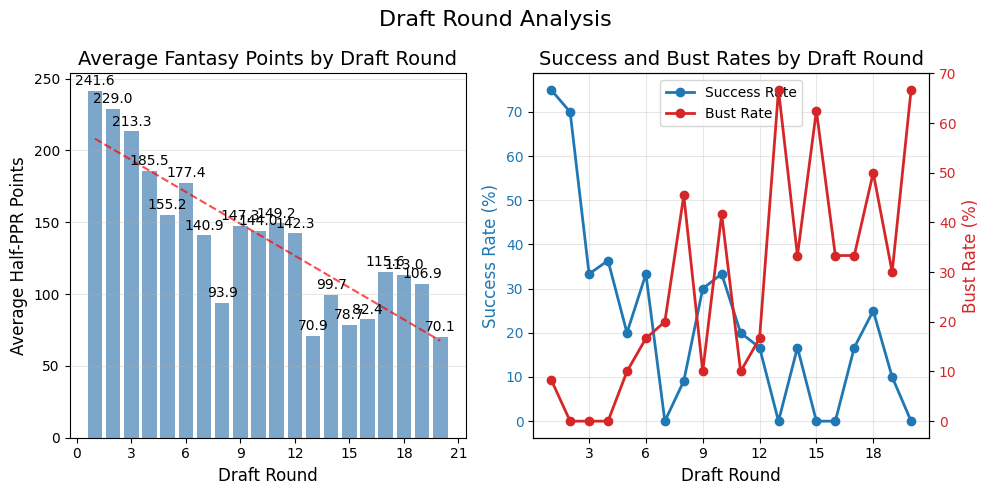

<Figure size 1200x800 with 0 Axes>

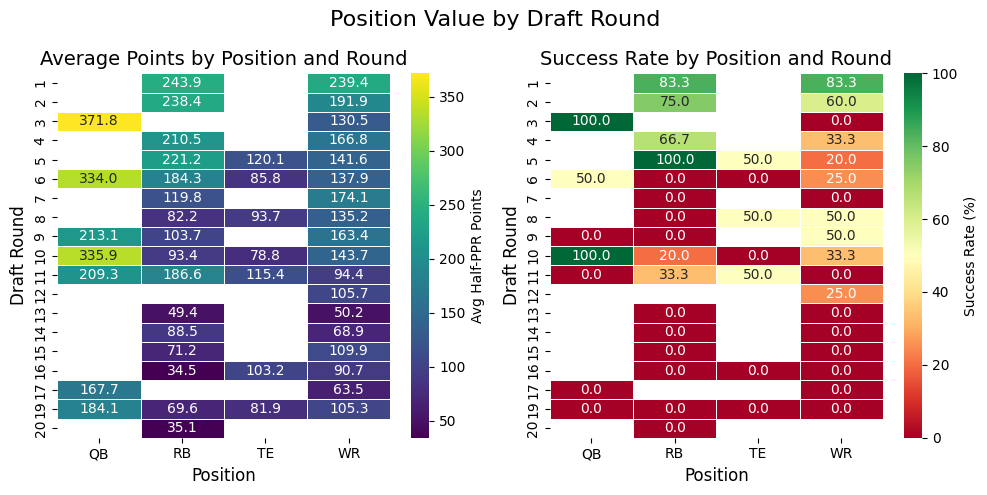

/Users/henrymarsh/Documents/fantasy_football_analysis/src/visualization/draft_vis.py:256: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/yq/r0_t1gcx41v4xqkn7vx2mp_m0000gn/T/ipykernel_95372/1793977662.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
2025-03-28 20:48:17,540 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,540 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,541 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,541 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,542 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,542 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,543 - WARNING - posx and posy should be finite values
2025-

<Figure size 1200x800 with 0 Axes>

2025-03-28 20:48:17,627 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,627 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,627 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,628 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,628 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,629 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,629 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,630 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,631 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,632 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,633 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,634 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,635 - WARNING - posx and posy should be finite values
2025-03-28 20:48:17,635 - WARNING - po

ValueError: Image size of 3605x68491 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x500 with 2 Axes>

In [7]:
# 4. Create visualizations
# Round performance
plt.figure(figsize=(12, 8))
plot_round_performance(adp_results['round_stats'])
plt.tight_layout()
plt.savefig('../outputs/figures/round_performance.png')
plt.show()

# Position value by round
plt.figure(figsize=(12, 8))
plot_position_value_by_round(adp_results['position_round_stats'])
plt.tight_layout()
plt.savefig('../outputs/figures/position_value_by_round.png')
plt.show()

# VBD rankings
plt.figure(figsize=(12, 8))
plot_vbd_rankings(vbd_df)
plt.tight_layout()
plt.savefig('../outputs/figures/vbd_rankings.png')
plt.show()

In [10]:
# 5. Save processed data
vbd_df.to_csv(os.path.join(config['data_paths']['processed_data'], 'vbd_rankings.csv'), index=False)

In [11]:
# Save ADP analysis results
for key, df in adp_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

print("Draft value analysis completed!")

Draft value analysis completed!
